#Importing Libraries and Checking the Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path = "https://raw.githubusercontent.com/Arhaan-P/Finlatics-DS-Project/main/GlobalYouTubeStatistics.csv"
missing_values = [0, 0.00, np.nan]
df = pd.read_csv(path, encoding='latin-1', na_values=missing_values)

##Removing duplicate rows


In [2]:
# Identify duplicate rows
duplicate_rows = df[df.duplicated()]

# Printing duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

# Drop duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

Duplicate Rows:
      rank                                           Youtuber  subscribers  \
995     12                                                WWE   96000000.0   
996     13                                             Gaming   93600000.0   
997     39  LooLoo Kids - Nursery Rhymes and Children's Songs   54000000.0   
998     40                                         Ed Sheeran   53500000.0   
999     41                                  Infobells - Hindi   53300000.0   
1000   620                                          MY FAMILY   15700000.0   
1001   779                                           The Dodo   14200000.0   
1002   787                                   Supercar Blondie   14100000.0   
1003   871                               Just For Laughs Gags   13300000.0   
1004   872                                   Kabita's Kitchen   13300000.0   
1005   873                                         BanderitaX   13300000.0   

       video views          category  \
995   7

In [3]:
df.tail(15)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,Country,Abbreviation,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
980,981,Zee Kids,NaN,7.683670e+09,Film & Animation,Zee Kids,1212.0,India,India,IN,...,100000.0,2012.0,Jul,6.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
981,982,Pari's Lifestyle,12400000.0,7.741765e+09,People & Blogs,Pari's Lifestyle,459.0,India,India,IN,...,NaN,2018.0,Nov,26.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
982,983,DisneyChannelUK,12400000.0,1.260749e+10,Music,DisneyChannelUK,4422.0,United Kingdom,United Kingdom,GB,...,NaN,2007.0,Dec,6.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
983,984,MoniLina,12400000.0,1.608681e+10,Comedy,MoniLinaFamily,NaN,United States,United States,US,...,100.0,2016.0,May,10.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
984,985,bharatzkitchen HINDI,12400000.0,2.315227e+09,Howto & Style,bharatzkitchen HINDI,729.0,India,India,IN,...,100000.0,2016.0,Aug,10.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
985,986,TKOR,12400000.0,3.392023e+09,Education,TKoR,NaN,NaN,NaN,NaN,...,NaN,2006.0,Aug,16.0,NaN,NaN,NaN,NaN,NaN,NaN
986,987,ANNA KOVA,12400000.0,1.395959e+10,People & Blogs,annakova,1.0,NaN,NaN,NaN,...,NaN,2006.0,Jun,18.0,NaN,NaN,NaN,NaN,NaN,NaN
987,988,Avril Lavigne,12400000.0,6.202090e+09,Music,Avril Lavigne,205.0,United States,United States,US,...,NaN,2005.0,Oct,8.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
988,989,Caylus,12400000.0,4.779140e+09,Education,Caylus,1340.0,United States,United States,US,...,400000.0,2016.0,Apr,6.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
989,990,Migos ATL,12400000.0,6.993406e+09,Music,Migos ATL,99.0,United States,United States,US,...,100000.0,2012.0,Jan,17.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


#Changing column names and dropping uneccesary ones


In [4]:
drop_columns = ['Country of origin', 'Abbreviation', 'Title', 'video_views_rank', 'country_rank', 'channel_type_rank']
df.drop(columns=drop_columns, inplace=True)

columns_to_rename = {
    'Youtuber': 'channel_name',
    'Country': 'country',
    'created_year': 'year_created',
    'created_month': 'month_created',
    'created_date': 'date_created',
    'Gross tertiary education enrollment (%)': 'tertiary_education_enrollment',
    'Population': 'population',
    'Unemployment rate': 'unemployment_rate',
    'Urban_population': 'urban_population'
}
df.rename(columns=columns_to_rename, inplace=True)

#Checking and dealing with null values

In [5]:
# Checking null values
df.isnull().sum()

rank                                  0
channel_name                          0
subscribers                           3
video views                           8
category                             53
uploads                              43
country                             122
channel_type                         30
video_views_for_the_last_30_days     56
lowest_monthly_earnings             118
highest_monthly_earnings             89
lowest_yearly_earnings               89
highest_yearly_earnings              79
subscribers_for_last_30_days        337
year_created                          5
month_created                        12
date_created                          5
tertiary_education_enrollment       123
population                          123
unemployment_rate                   123
urban_population                    123
Latitude                            123
Longitude                           123
dtype: int64

##Subscribers Column

In [6]:
# We will deal with the 'subscribers' null values
df.loc[df['subscribers'].isnull()]
# After looking at the dataset, the value 12400000 is present for most of the rows nearby so we will replace null values with 12400000
df.loc[df['rank'].isin([979, 980, 981]), 'subscribers'] = 12400000

##Video Views column


In [7]:
#Replacing null values using interpolation
df['video views'].interpolate(method='linear', inplace=True)

##Category Column

In [8]:
# Replacing null values with most frequent values
most_frequent_category = df['category'].mode().iat[0]
print(most_frequent_category)
# The most frequent category is 'Entertainment'
df['category'].fillna(most_frequent_category, inplace=True)

Entertainment


##Uploads column


In [9]:
#Replacing null values with mean
mean_uploads = df['uploads'].mean()
print(f"Mean Uploads: {mean_uploads}")
df['uploads'].fillna(int(round(mean_uploads)), inplace=True)
df.loc[df['uploads'] < 10, 'uploads'] = int(round(mean_uploads))

Mean Uploads: 9602.090336134454


##Country Column


In [10]:
# Replacing null values in 'country' column with most frequent values
most_frequent_country = df['country'].mode().iat[0]
print(f"Most frequent country: {most_frequent_country}")
#The most frequent country is 'United States'
df['country'].fillna(most_frequent_country, inplace=True)

Most frequent country: United States


##Channel_type column


In [11]:
# Replacing null values in 'channel_type' column with most frequent values
most_frequent_channel_type = df['channel_type'].mode().iat[0]
print(f"Most frequent channel type: {most_frequent_channel_type}")
# The most frequent channel type is 'Entertainment'
df['channel_type'].fillna(most_frequent_channel_type, inplace=True)

Most frequent channel type: Entertainment


##Views for last 30 days column



In [12]:
# Replacing null values in 'video_views_for_the_last_30_days' column with mean
mean_views_last_30 = df['video_views_for_the_last_30_days'].mean()
print(f"Mean: {mean_views_last_30}")
df['video_views_for_the_last_30_days'].fillna(int(round(mean_views_last_30)), inplace=True)

Mean: 175610284.7944622


##All earnings columns



In [13]:
# Replacing null values in the columns: 'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings' and 'highest_yearly_earnings' with mean
mean_lowest_monthly_earnings = df['lowest_monthly_earnings'].mean()
df['lowest_monthly_earnings'].fillna(int(round(mean_lowest_monthly_earnings)), inplace=True)
print(f"Mean lowest monthly earnings: {mean_lowest_monthly_earnings}")

mean_highest_monthly_earnings = df['highest_monthly_earnings'].mean()
df['highest_monthly_earnings'].fillna(int(round(mean_highest_monthly_earnings)), inplace=True)
print(f"Mean highest monthly earnings: {mean_highest_monthly_earnings}")

mean_lowest_yearly_earnings = df['lowest_yearly_earnings'].mean()
df['lowest_yearly_earnings'].fillna(int(round(mean_lowest_yearly_earnings)), inplace=True)
print(f"Mean lowest yearly earnings: {mean_lowest_yearly_earnings}")

mean_highest_yearly_earnings = df['highest_yearly_earnings'].mean()
df['highest_yearly_earnings'].fillna(int(round(mean_highest_yearly_earnings)), inplace=True)
print(f"Mean highest yearly earnings: {mean_highest_yearly_earnings}")

Mean lowest monthly earnings: 41849.16481185861
Mean highest monthly earnings: 647747.0290838853
Mean lowest yearly earnings: 485702.1032781458
Mean highest yearly earnings: 7692581.71389738


##Subscribers last 30 days column


In [14]:
# Replacing null values in 'subscribers_for_last_30_days' column with mean
mean_subs_last_30 = df['subscribers_for_last_30_days'].mean()
print(f"Mean: {mean_subs_last_30}")
df['subscribers_for_last_30_days'].fillna(int(round(mean_subs_last_30)), inplace=True)

Mean: 349079.13221884496


##Year, month and date created columns


In [15]:
# Replacing null values with most frequent values
most_frequent_year = int(df['year_created'].mode().iat[0])
print(f"Most frequent year: {most_frequent_year}")
# The most frequent year is '2014'
df['year_created'].fillna(most_frequent_year, inplace=True)

most_frequent_month = df['month_created'].mode().iat[0]
print(f"Most frequent month: {most_frequent_month}")
# The most frequent month is 'Jan'
df['month_created'].fillna(most_frequent_month, inplace=True)

most_frequent_date = int(df['date_created'].mode().iat[0])
print(f"Most frequent date: {most_frequent_date}")
# The most frequent date is '9'
df['date_created'].fillna(most_frequent_date, inplace=True)

Most frequent year: 2014
Most frequent month: Jan
Most frequent date: 9


##tertiary_education_enrollment, population, unemployment_rate,Urban_population_percentage, Latitude and Longitude Columns   

In [16]:
# Replacing null values in 'tertiary_education_enrollment', 'population', 'unemployment_rate', 'urban_population' with same values from the same country
df['tertiary_education_enrollment'] = df.groupby('country')['tertiary_education_enrollment'].transform(lambda x: x.fillna(x.mean()))

df['population'] = df.groupby('country')['population'].transform(lambda x: x.fillna(x.mean()))

df['unemployment_rate'] = df.groupby('country')['unemployment_rate'].transform(lambda x: x.fillna(x.mean()))

df['urban_population'] = df.groupby('country')['urban_population'].transform(lambda x: x.fillna(x.mean()))

# Impute missing longitude and latitude with mean coordinates of channels from the same country
df['Longitude'] = df.groupby('country')['Longitude'].transform(lambda x: x.fillna(x.mean()))
df['Latitude'] = df.groupby('country')['Latitude'].transform(lambda x: x.fillna(x.mean()))

#Since for Andorra, there is only one record, we will the data manually
df.iloc[663, df.columns.get_loc('tertiary_education_enrollment')] = 34.0
df.iloc[663, df.columns.get_loc('population')] = 80321
df.iloc[663, df.columns.get_loc('unemployment_rate')] = 1.9
df.iloc[663, df.columns.get_loc('urban_population')] = 68043
df.iloc[663, df.columns.get_loc('Latitude')] = 42.5063
df.iloc[663, df.columns.get_loc('Longitude')] = 1.5218

##Output to another csv


In [17]:
df.to_csv('Cleaned.csv')
from google.colab import files
files.download('Cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Answering Questions


##1. What are the top 10 YouTube channels based on the number of subscribers?

In [18]:
print("Top 10 YouTube channels based on subscribers:\n")
print(df[['rank', 'channel_name', 'subscribers']].head(10))

Top 10 YouTube channels based on subscribers:

   rank                channel_name  subscribers
0     1                    T-Series  245000000.0
1     2              YouTube Movies  170000000.0
2     3                     MrBeast  166000000.0
3     4  Cocomelon - Nursery Rhymes  162000000.0
4     5                   SET India  159000000.0
5     6                       Music  119000000.0
6     7         ýýý Kids Diana Show  112000000.0
7     8                   PewDiePie  111000000.0
8     9                 Like Nastya  106000000.0
9    10               Vlad and Niki   98900000.0


##2. Which category has the highest average number of subscribers?

In [19]:
avg_subs_cat = df.groupby('category')['subscribers'].mean()
highest_avg_subs_cat = avg_subs_cat.idxmax()
highest_avg_subs = avg_subs_cat.max()
print(f"The category with highest average subscribers is {highest_avg_subs_cat} with an average of {int(highest_avg_subs)} subscribers")

The category with highest average subscribers is Shows with an average of 41615384 subscribers


##3. How many videos, on average, are uploaded by YouTube channels in each category?

In [20]:
avg_uploads = df.groupby('category')['uploads'].mean()
print("\nAverage number of uploads per category: \n")
print(avg_uploads)


Average number of uploads per category: 

category
Autos & Vehicles           1898.500000
Comedy                     1954.536232
Education                  3782.977778
Entertainment             11160.907216
Film & Animation           4355.088889
Gaming                     5436.914894
Howto & Style              2439.384615
Movies                     3553.000000
Music                      3063.567164
News & Politics          112853.461538
Nonprofits & Activism    102912.000000
People & Blogs            10575.801527
Pets & Animals             6850.000000
Science & Technology       3243.647059
Shows                     28182.307692
Sports                    14493.727273
Trailers                   6839.000000
Travel & Events             766.000000
Name: uploads, dtype: float64


##4. What are the top 5 countries with the highest number of YouTube channels?

In [21]:
country_count = df.groupby('country')['channel_name'].count()
top_5_countries = country_count.sort_values(ascending = False).head(5)
print(f"\nTop 5 countries with the highest number of YouTube channels: \n{top_5_countries}")


Top 5 countries with the highest number of YouTube channels: 
country
United States     435
India             167
Brazil             62
United Kingdom     43
Mexico             33
Name: channel_name, dtype: int64


##5. What is the distribution of channel types across different categories?

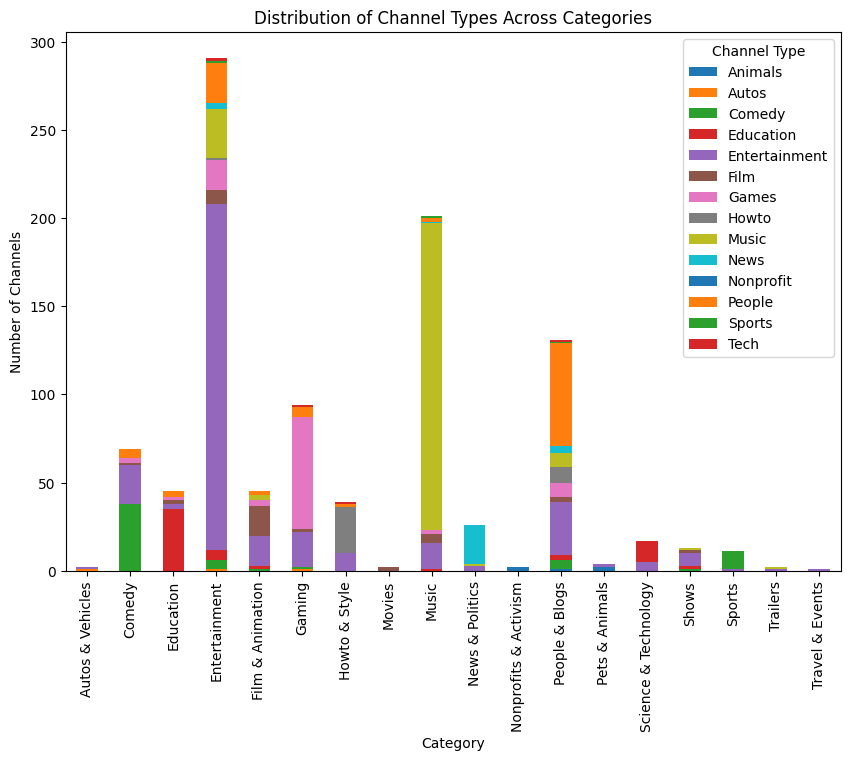

In [22]:
channel_type_distribution = pd.crosstab(df['category'], df['channel_type'])

# Plotting the crosstab
channel_type_distribution.plot(kind = 'bar', stacked = True, figsize = (10, 7))

plt.title('Distribution of Channel Types Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Channels')
plt.legend(title = 'Channel Type')
plt.show()

##6. Is there a correlation between the number of subscribers and total video views for YouTube channels?

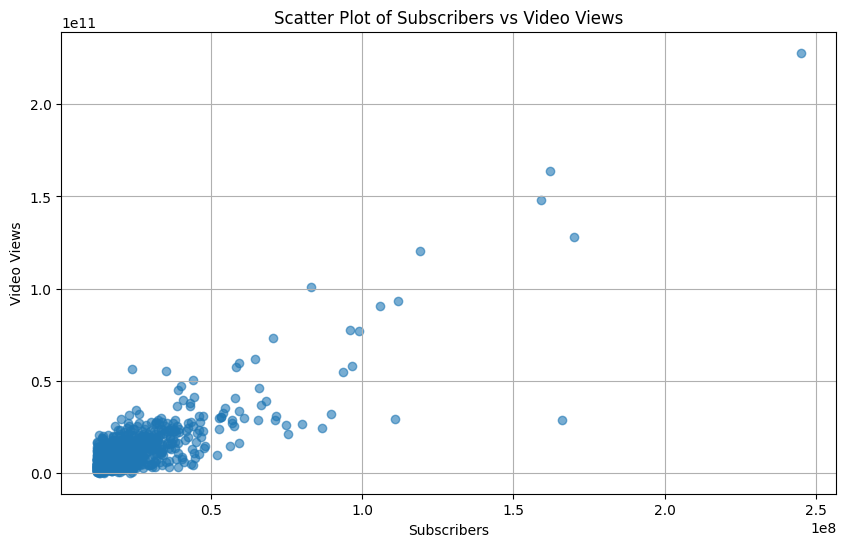

In [23]:
# We will use scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['subscribers'], df['video views'], alpha=0.6)
plt.title('Scatter Plot of Subscribers vs Video Views')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.grid(True)
plt.show()

# Looking at the graph, we can see a positive correlation

##7. How do the monthly earnings vary throughout different categories?

Average monthly earnings by category:                        lowest_monthly_earnings  highest_monthly_earnings
category                                                                
Autos & Vehicles                  68300.000000              1.086350e+06
Comedy                            47326.101449              7.528010e+05
Education                         46161.244667              7.383609e+05
Entertainment                     48947.297423              7.545286e+05
Film & Animation                  53312.378000              8.065616e+05
Gaming                            20519.596596              3.132510e+05
Howto & Style                     15272.846667              2.423719e+05
Movies                            49324.500000              7.785735e+05
Music                             38095.713483              5.969415e+05
News & Politics                   41802.201923              6.675453e+05
Nonprofits & Activism             24400.000000              3.904000e+05
People & Blog

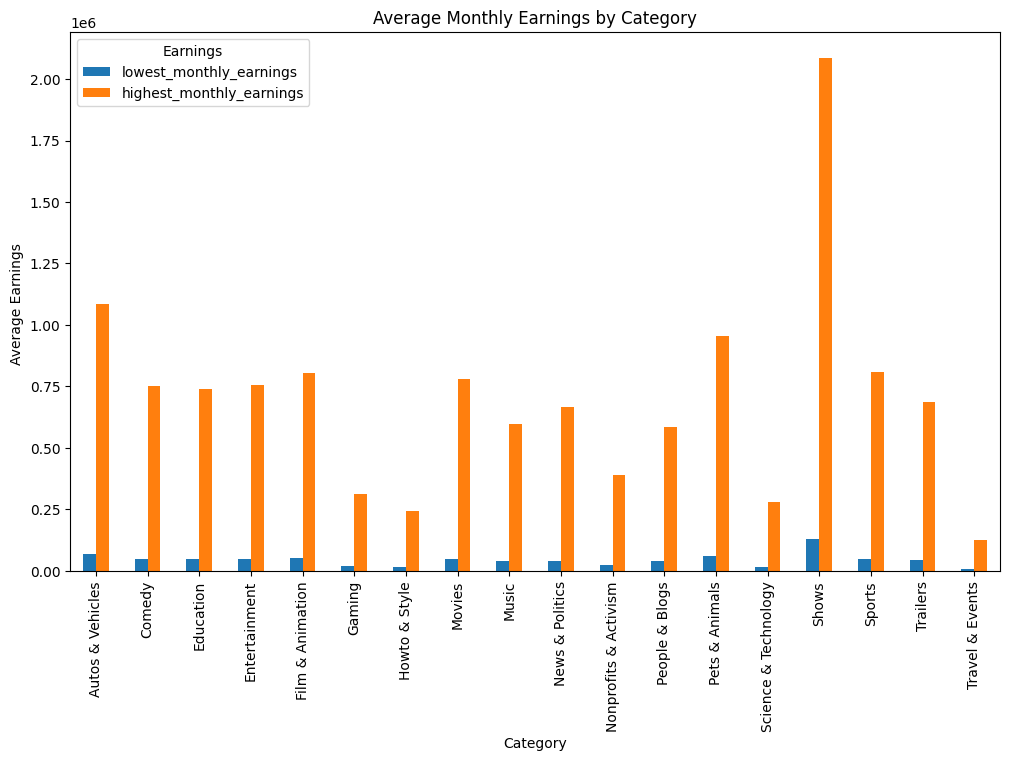

In [24]:
category_earnings = df.groupby('category')[['lowest_monthly_earnings', 'highest_monthly_earnings']].mean()

print(f"Average monthly earnings by category: {category_earnings}")

category_earnings.plot(kind = 'bar', figsize = (12, 7))
plt.title('Average Monthly Earnings by Category')
plt.xlabel('Category')
plt.ylabel('Average Earnings ')
plt.legend(title = 'Earnings')
plt.show()


##8. What is the overall trend in subscribers gained in the last 30 days across all channels?

The average number of subscribers gained in the last 30 days across all channels is 349079


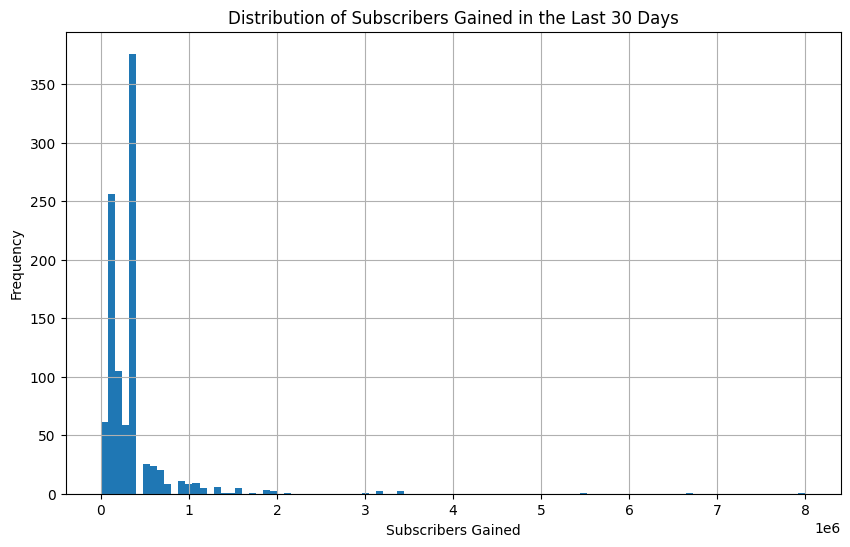

In [25]:
# Calculate the average subscribers gained in the last 30 days
avg_subs_gained = df['subscribers_for_last_30_days'].mean()
print(f"The average number of subscribers gained in the last 30 days across all channels is {int(avg_subs_gained)}")

# Plotting a histogram of subscribers gained in the last 30 days
plt.figure(figsize=(10, 6))
plt.hist(df['subscribers_for_last_30_days'], bins = 100)
plt.title('Distribution of Subscribers Gained in the Last 30 Days')
plt.xlabel('Subscribers Gained')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


##9. Are there any outliers in terms of yearly earnings from YouTube channels?

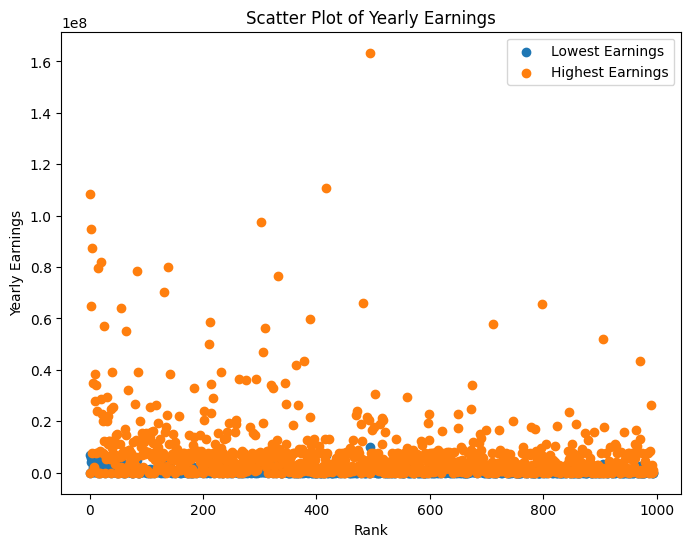

In [26]:
# Plotting scatter plot to look for outliers
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['lowest_yearly_earnings'], label='Lowest Earnings')
plt.scatter(df.index, df['highest_yearly_earnings'], label='Highest Earnings')
plt.title('Scatter Plot of Yearly Earnings')
plt.xlabel('Rank')
plt.ylabel('Yearly Earnings')
plt.legend()
plt.show()

#Looking at the scatter plot, we can see outliers (points that are far from the bulk of the data)

##10. What is the distribution of channel creation dates? Is there any trend over time?

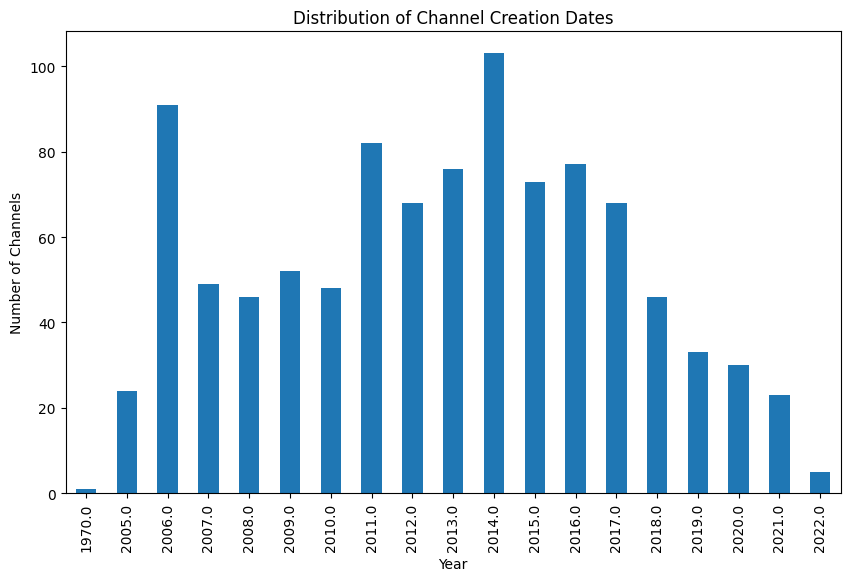

The average number of channels created per year is 52


In [27]:
created_year_counts = df.groupby(df['year_created'])['channel_name'].count()

# Plotting a bar chart
created_year_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Channel Creation Dates')
plt.xlabel('Year')
plt.ylabel('Number of Channels')
plt.show()

# Calculateing the average number of channels created per year
avg_channels_per_year = created_year_counts.mean()
print(f"The average number of channels created per year is {int(avg_channels_per_year)}")

# Looking at the bar chart, we can see a general upward trend in the number of channels created per year

##11. Is there a relationship between gross tertiary education enrollment and the number of YouTube channels in a country?

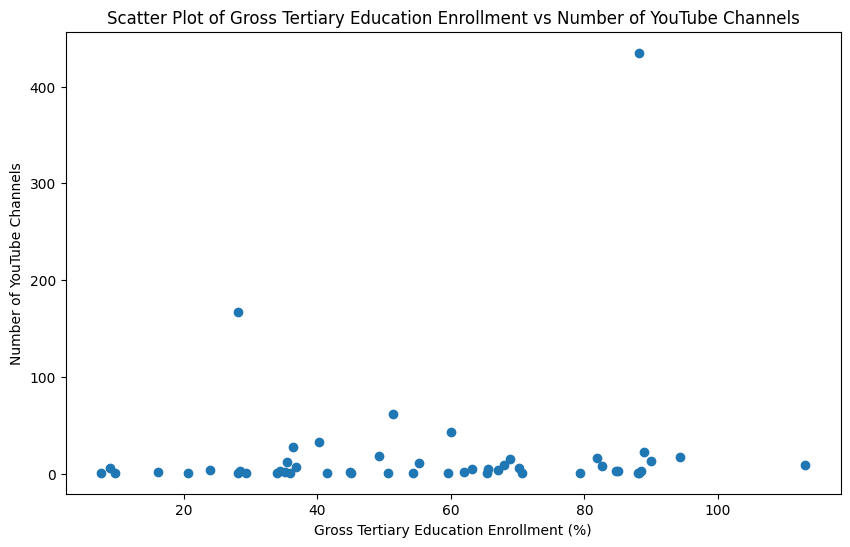

Correlation between education enrollment and channel count: 0.1380191527398488
Hence, it can be said that there is a very weak positive correlation


In [28]:
grouped_df = df.groupby('country')

# Calculating the mean of tertiary education enrollment and number of channels per country
education_enrollment = grouped_df['tertiary_education_enrollment'].mean()
channel_count = grouped_df['channel_name'].count()
# Plotting a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(education_enrollment, channel_count)
plt.title('Scatter Plot of Gross Tertiary Education Enrollment vs Number of YouTube Channels')
plt.xlabel('Gross Tertiary Education Enrollment (%)')
plt.ylabel('Number of YouTube Channels')
plt.show()

correlation = education_enrollment.corr(channel_count)

print(f"Correlation between education enrollment and channel count: {correlation}")
print("Hence, it can be said that there is a very weak positive correlation")

##12. How does the unemployment rate vary among the top 10 countries with the highest number of YouTube channels?

The top 10 countries: 
Index(['United States', 'India', 'Brazil', 'United Kingdom', 'Mexico',
       'Indonesia', 'Spain', 'Thailand', 'South Korea', 'Russia'],
      dtype='object', name='country')
country
Brazil            12.08
India              5.36
Indonesia          4.69
Mexico             3.42
Russia             4.59
South Korea        4.15
Spain             13.96
Thailand           0.75
United Kingdom     3.85
United States     14.70
Name: unemployment_rate, dtype: float64


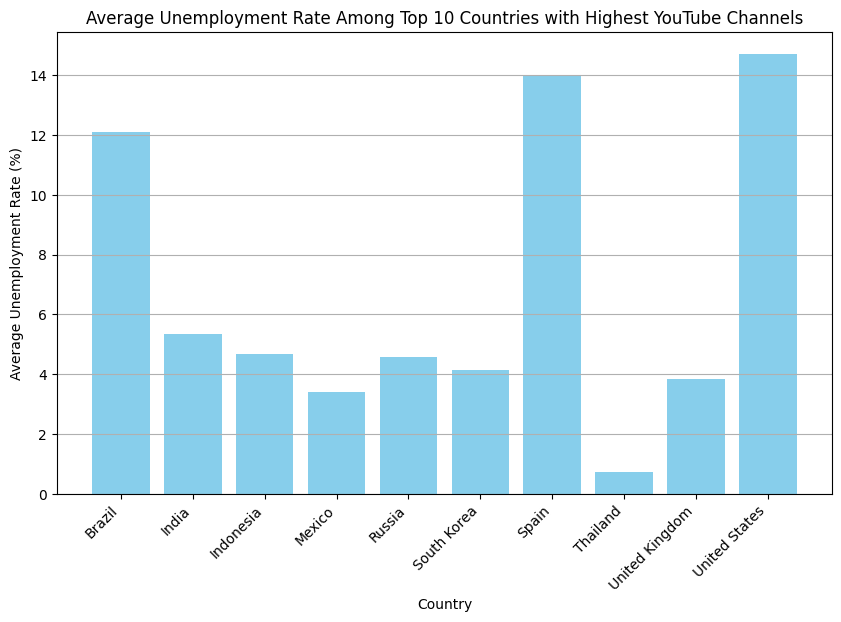

In [29]:
num_channels_by_country = df['country'].value_counts()
top_10_countries = num_channels_by_country.head(10)
top_10_countries = top_10_countries.index
print(f"The top 10 countries: \n{top_10_countries}")
# Filtering the DataFrame for the top 10 countries
top_10_unemployment_rates = df[df['country'].isin(top_10_countries)]

# Calculating average unemployment rate for each country among the top 10
average_unemployment_rate_top_10 = top_10_unemployment_rates.groupby('country')['unemployment_rate'].mean()

print(average_unemployment_rate_top_10)

plt.figure(figsize=(10, 6))
plt.bar(average_unemployment_rate_top_10.index, average_unemployment_rate_top_10.values, color='skyblue')
plt.title('Average Unemployment Rate Among Top 10 Countries with Highest YouTube Channels')
plt.xlabel('Country')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

##13. What is the average urban population percentage in countries with YouTube channels?


In [30]:
average_urban_population = df['urban_population'].mean()
print(f"Average urban population percentage in countries with YouTube channels: {int(average_urban_population)}")

Average urban population percentage in countries with YouTube channels: 229684845


##14. Are there any patterns in the distribution of YouTube channels based on latitude and longitude coordinates?


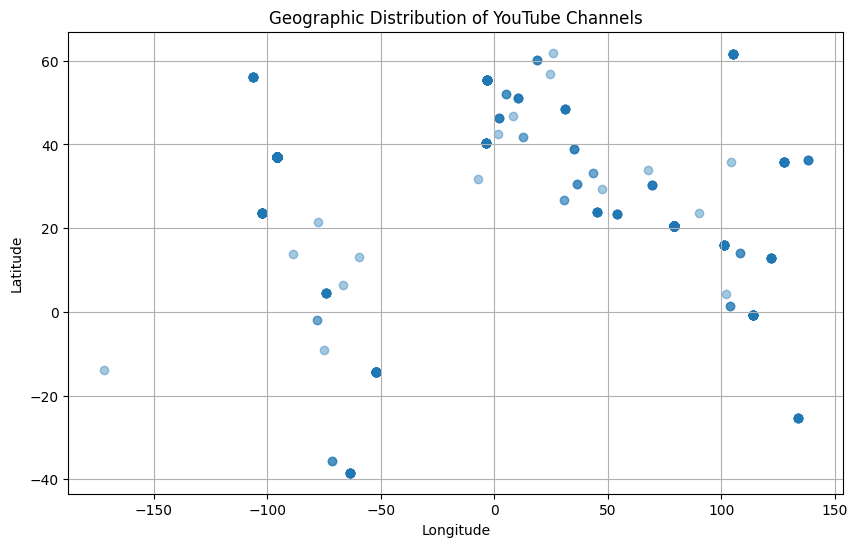

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.4)
plt.title('Geographic Distribution of YouTube Channels')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()
# Looking at the scatter plot, we can see that the channels are distributed all over the world, with higher concentrations in some regions such as North America, Europe, and Asia.


##15. What is the correlation between the number of subscribers and the population of a country?

Population data: 
                  country    population
507                 China  1.397715e+09
0                   India  1.366418e+09
1           United States  3.282395e+08
117             Indonesia  2.702039e+08
56               Pakistan  2.165653e+08
23                 Brazil  2.125594e+08
808            Bangladesh  1.673108e+08
8                  Russia  1.443735e+08
7                   Japan  1.262266e+08
71                 Mexico  1.260140e+08
60            Philippines  1.081166e+08
637                 Egypt  1.003881e+08
489               Vietnam  9.646211e+07
132                Turkey  8.342962e+07
294               Germany  8.313280e+07
61               Thailand  6.962558e+07
315                France  6.705989e+07
16         United Kingdom  6.683440e+07
212                 Italy  6.029740e+07
13            South Korea  5.170910e+07
63               Colombia  5.033944e+07
81                  Spain  4.707678e+07
31              Argentina  4.493871e+07
379               Ukra

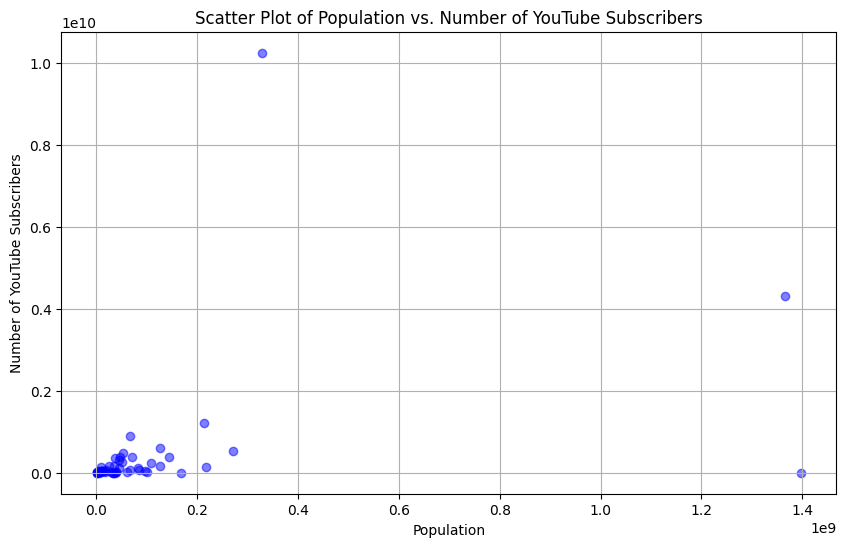

In [32]:
# Since we have a situation 'india' and 'India'
df['country'] = df['country'].str.strip().str.title()
subscribers_by_country = df.groupby('country')['subscribers'].sum().reset_index()
# Merging this data with the population data for each country
population_data = df[['country', 'population']].drop_duplicates()
print(f"Population data: \n{population_data.sort_values(by = 'population', ascending = False)}\n")
merged_data = pd.merge(subscribers_by_country, population_data, on='country')

# Plotting a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['population'], merged_data['subscribers'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Population vs. Number of YouTube Subscribers')
plt.xlabel('Population')
plt.ylabel('Number of YouTube Subscribers')
plt.grid(True)
plt.show()

# Looking at the scatter plot, there is a positive correlation (with a few outliers)

##16. How do the top 10 countries with the highest number of YouTube channels compare in terms of their total population?


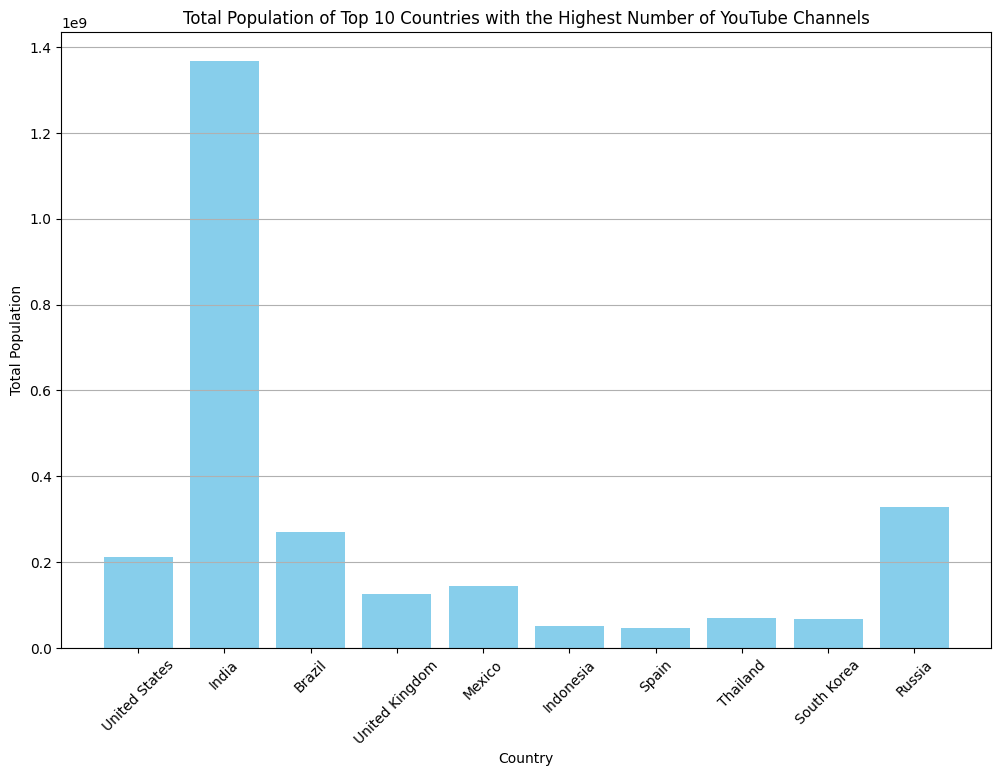

In [33]:
top_10_population = df[df['country'].isin(top_10_countries)]

# Calculating average population for each country among the top 10
average_population_top_10 = top_10_population.groupby('country')['population'].mean()

# Bar Plot
plt.figure(figsize=(12, 8))
plt.bar(top_10_countries, average_population_top_10, color='skyblue')
plt.title('Total Population of Top 10 Countries with the Highest Number of YouTube Channels')
plt.xlabel('Country')
plt.ylabel('Total Population')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

##17.Is there a correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country?

Correlation between subscribers gained in last 30 days and unemployment rate: 0.2798794879627204


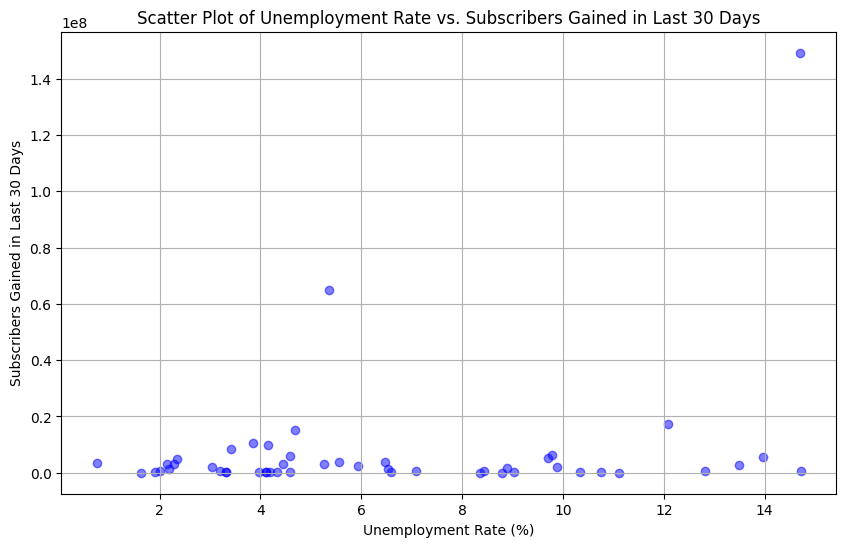

In [34]:
subscribers_30_days = df.groupby('country')['subscribers_for_last_30_days'].sum()
unemployment_rate = df.groupby('country')['unemployment_rate'].mean()

# Merging the two DataFrames
merged_data = pd.merge(subscribers_30_days, unemployment_rate, on = 'country')

# Calculating the correlation coefficient
correlation = merged_data['subscribers_for_last_30_days'].corr(merged_data['unemployment_rate'])

print(f"Correlation between subscribers gained in last 30 days and unemployment rate: {correlation}")

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['unemployment_rate'], merged_data['subscribers_for_last_30_days'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Unemployment Rate vs. Subscribers Gained in Last 30 Days')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Subscribers Gained in Last 30 Days')
plt.grid(True)
plt.show()
# Looking at the graph, we can see a weak positive correlation

##18.How does the distribution of video views for the last 30 days vary across different channel types?

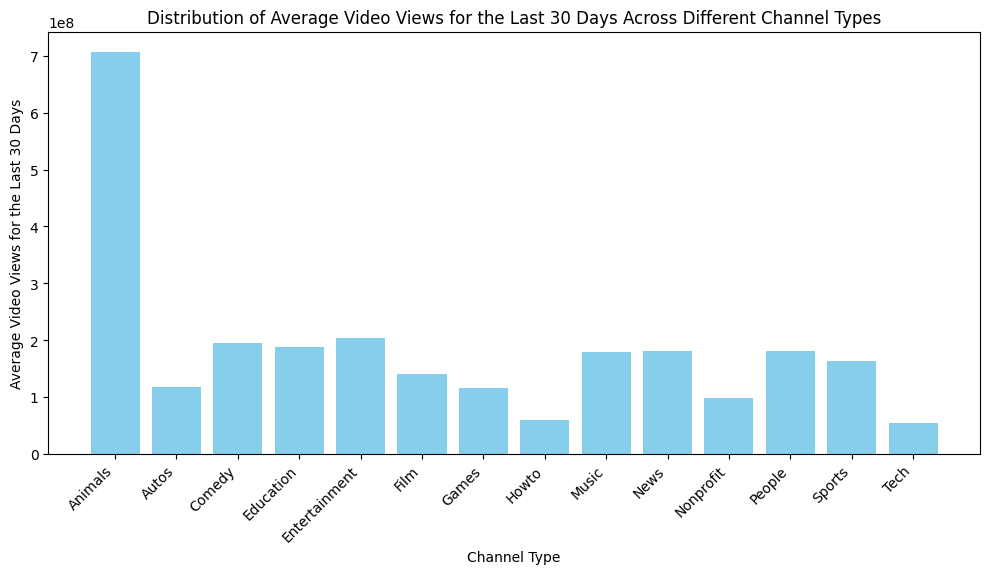

In [35]:
average_video_views_by_channel_type = df.groupby('channel_type')['video_views_for_the_last_30_days'].mean()

channel_types = average_video_views_by_channel_type.index

average_video_views = average_video_views_by_channel_type.values

# Plotting a bar graph
plt.figure(figsize=(10, 6))
plt.bar(channel_types, average_video_views, color='skyblue')
plt.title('Distribution of Average Video Views for the Last 30 Days Across Different Channel Types')
plt.xlabel('Channel Type')
plt.ylabel('Average Video Views for the Last 30 Days')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##19.Are there any seasonal trends in the number of videos uploaded by YouTube channels?


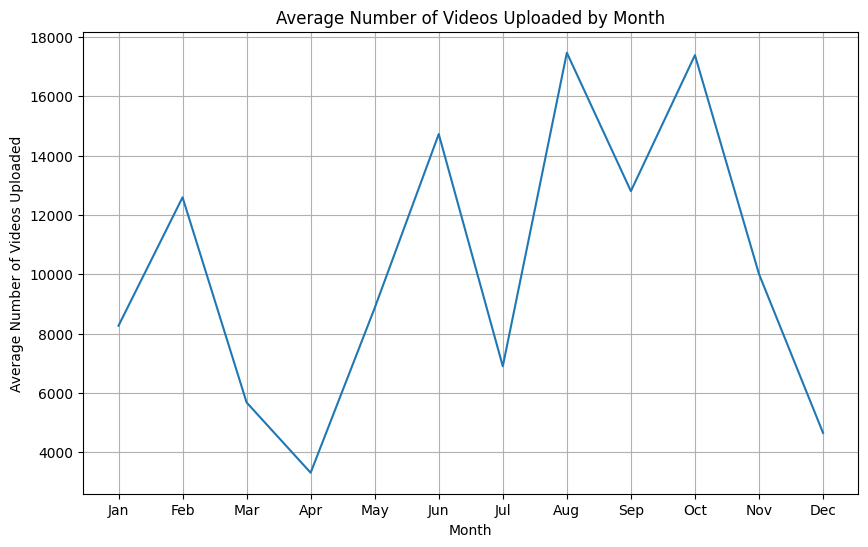

In [36]:
# Defining the order of months
categories = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

average_videos_by_month = df.groupby('month_created')['uploads'].mean()

# Converting the index to a categorical
average_videos_by_month.index = pd.Categorical(average_videos_by_month.index, categories = categories, ordered = True)

# Sorting the Series by the index
average_videos_by_month = average_videos_by_month.sort_index()

# Plotting the average number of videos uploaded for each month
plt.figure(figsize=(10, 6))
plt.plot(average_videos_by_month.index, average_videos_by_month.values)
plt.title('Average Number of Videos Uploaded by Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Videos Uploaded')
plt.grid(True)
plt.show()

# Looking at the plot, we can see that there is a slight increase in the number of videos uploaded during the months (June, August, October)

##20.What is the average number of subscribers gained per month since the creation of YouTube channels till now?

In [37]:
# Converting the 'month_created' column to categorical data type
df['month_created'] = df['month_created'].astype('category')

# Converting the categorical month data to numerical codes and add 1 to avoid 0 indexing
df['month_created'] = df['month_created'].cat.codes + 1

# Converting the 'year_created' column to categorical data type
df['year_created'] = df['year_created'].astype('category')

# Converting the categorical year data to numerical codes and add 1 to avoid 0 indexing
df['year_created'] = df['year_created'].cat.codes + 1

# Calculating the total number of months since creation for each entry
df['months_since_creation'] = (df['year_created'] * 12) + df['month_created']

# Calculating the average number of subscribers gained per month
average_subscribers_per_month = df['subscribers'] / df['months_since_creation']

# Print the mean value of the calculated average subscribers per month
print(f"Average number of subscribers gained per month: {int(average_subscribers_per_month.mean())}")

Average number of subscribers gained per month: 63065
